In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def get_waiting_time(min_wait_time, anom_diff_exp):
    
    R = np.random.uniform(0,1)
    waiting_time = min_wait_time / (R**(1/anom_diff_exp))
    
    return waiting_time

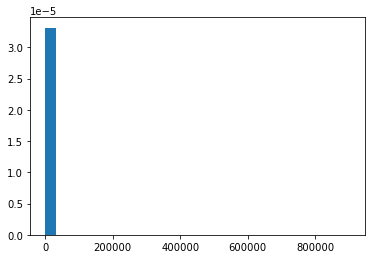

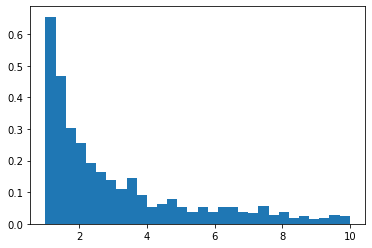

In [3]:
def check_waiting_times(nsamples, alpha, plot_range=None, min_waiting_time=1):
    # plotting probability distribution of waiting times as a check
    waiting_times = np.empty((nsamples))
    for i in range(nsamples):
        waiting_times[i] = get_waiting_time(min_waiting_time, alpha)
    plt.figure()
    plt.hist(waiting_times, bins=30, range=plot_range, density=True)

check_waiting_times(1000, 0.5)
check_waiting_times(1000, 0.5, plot_range=(1,10))

In [4]:
def gaussian_step(D, t, ndim=1):
    
    var = 2*ndim*D*t
    dx = np.random.normal(scale=np.sqrt(var))
    return dx

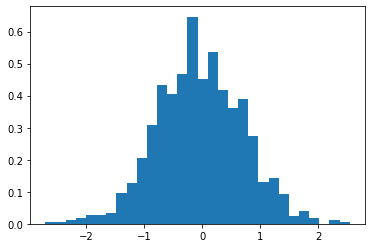

In [5]:
def check_steps(nsamples, D_coeff, t):
    # plotting probability distribution of step lengths as a check

    step_lengths = np.empty((nsamples))
    for i in range(nsamples):
        step_lengths[i] = gaussian_step(D_coeff, t)
    plt.figure()
    plt.hist(step_lengths, bins=30, density=True)
    
check_steps(1000,2.8e11,1e-12)

In [6]:
# CTRW for single particle in 1D
def ctrw(x_start, diff_coeff, diff_time, run_time, min_wait_time, anom_diff_exp, plot=0):
    """
    Be consistent with units
    run_time: simulation time 
    diff_time: diffusion time
    min_wait_time: minimum waiting time
    """
    time = 0
    x = x_start
    times = np.array([time])
    xs = np.array([x])
    while time < run_time:
        waiting_time = get_waiting_time(min_wait_time, anom_diff_exp)
        time += waiting_time
        times = np.append(times, time)
        xs = np.append(xs, xs[-1])
        x += gaussian_step(diff_coeff, diff_time)
        times = np.append(times, time)
        xs = np.append(xs, x)
    
    # correction so run time not exceeded
    times = times[:-2]
    xs = xs[:-2]
    times = np.append(times, run_time)
    xs = np.append(xs, xs[-1])
    
    data = {'t': times, 'x': xs}
    df = pd.DataFrame(data)
    if plot==1:
        %matplotlib inline
        plt.figure()
        plt.plot(df['t'], df['x'])
    return df

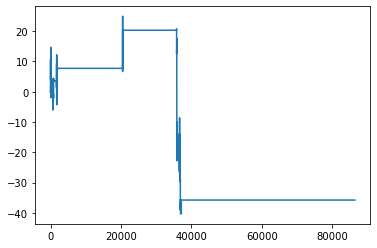

In [7]:
alpha = 0.5
D = 2.8e11  # nm^2/s
t = 1e-12  # jump time in s
A = 0.001  # minimum waiting time in s
run_t = 86400  # simulation run time in s

df = ctrw(0, D, t, run_t, A, alpha, plot=1)

In [8]:
def ctrw_3d(initial_position, diff_coeff, diff_time, run_time, min_wait_time, anom_diff_exp, plot=0):
    """
    """
    time = 0
    x, y, z = initial_position
    times = np.array([time])
    xs = np.array([x])
    ys = np.array([y])
    zs = np.array([z])
    
    while time < run_time:
        waiting_time = get_waiting_time(min_wait_time, anom_diff_exp)
        time += waiting_time  # update current time
        times = np.append(times, time)
        xs = np.append(xs, xs[-1])
        ys = np.append(ys, ys[-1])
        zs = np.append(zs, zs[-1])
        x += gaussian_step(diff_coeff, diff_time)  # update current x position
        y += gaussian_step(diff_coeff, diff_time)  # update current y position
        z += gaussian_step(diff_coeff, diff_time)  # update current z position
        times = np.append(times, time)
        xs = np.append(xs, x)
        ys = np.append(ys, y)
        zs = np.append(zs, z)
    
    # correction so run time not exceeded
    times = times[:-2]
    xs = xs[:-2]
    ys = ys[:-2]
    zs = zs[:-2]
    times = np.append(times, run_time)
    xs = np.append(xs, xs[-1])
    ys = np.append(ys, ys[-1])
    zs = np.append(zs, zs[-1])
    
    data = {'t': times, 'x': xs, 'y': ys, 'z': zs}
    df = pd.DataFrame(data)
                      
    if plot ==1:              
        %matplotlib notebook
        fig = plt.figure()
        ax = plt.axes(projection ='3d')
        ax.plot3D(df['x'], df['y'], df['z'], c='k')
        ax.scatter(df['x'][0], df['y'][0], df['z'][0], c='g')
        ax.scatter(df['x'].iat[-1], df['y'].iat[-1], df['z'].iat[-1], c='r')
    return df

<IPython.core.display.Javascript object>


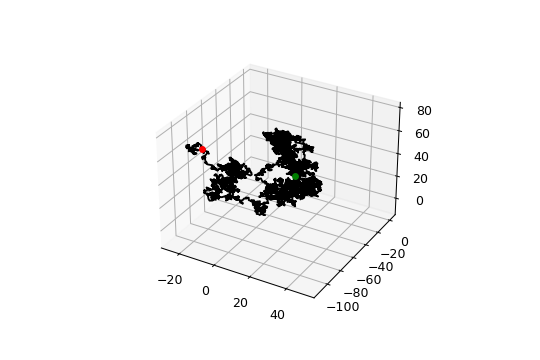

,t,x,y,z
0,0.000000,0.000000,0.000000,0.000000
1,0.002398,0.000000,0.000000,0.000000
2,0.002398,0.680318,-1.128283,0.287329
3,0.080584,0.680318,-1.128283,0.287329
4,0.080584,0.691675,-2.141687,1.395363
...,...,...,...,...
10175,22045.375410,-18.459797,-94.382663,62.319378
10176,22045.375410,-17.858393,-94.398974,63.163806
10177,22045.396897,-17.858393,-94.398974,63.163806
10178,22045.396897,-16.785809,-93.126279,63.646388


In [9]:
alpha = 0.5
D = 2.8e11  # nm^2/s
t = 1e-12  # jump time in s
A = 0.001  # minimum waiting time in s
run_t = 86400  # simulation run time in s

ctrw_3d((0,0,0), D, t, run_t, A, alpha, plot=1)

In [11]:
def gauss_step_3d(xyz_array, diff_coeff, diff_time):
    
    new_coords = np.zeros(3)
    
    xyz_array_row = xyz_array[-1]
    
    xyz_array = np.vstack((xyz_array, xyz_array_row))

    for i,x_i in enumerate(xyz_array_row):
        
        new_coords[i] = x_i + gaussian_step(diff_coeff,diff_time)
        
    xyz_array = np.vstack((xyz_array,new_coords))
    return xyz_array

def get_distance_3d(xyz_array1,xyz_array2):
    #function to get distance between two sets of coordinates
    
    distance = 0
    
    for i,x_i in enumerate(xyz_array1):
        
        distance += (x_i - (xyz_array2[i]))**2
        
    return np.sqrt(distance)

def interaction_process(p):
    #simple call to uniform function if within distance
    #could be altered to consider probability based on distance
    repair = 0 
    q = np.random.uniform(0,1)
    if q < p:
        repair = 1
    return repair

def get_halfway(xyz_array1,xyz_array2):
    
    halfway_coords = np.empty(3)
    
    for i,x_i in enumerate(xyz_array1):
        
        halfway_coords[i] = (x_i + xyz_array2[i])/2
        
    return halfway_coords


In [12]:
def ctrw_3d_interaction(initial_pos, diff_coeff, diff_time, run_time, min_wait_time, anom_diff_exp,
                        int_length, delay_time, interaction_p=1, plot=0, return_trajectories=False):
    """
    initial_pos: 2d array e.g. [(x1,y1,z1), (x2,y2,z2)]
    """
    repair = 0 
    time1 = 0
    time2 = 0 
    
    x1, y1, z1 = initial_pos[0]
    x2, y2, z2 = initial_pos[1]
    
    times1 = np.array([time1])
    times2 = np.array([time2])
    
    coords1 = np.array([[x1, y1, z1]])
    coords2 = np.array([[x2, y2, z2]])
    
    interaction_coords = np.array([[0,0,0,0,0,0]])
    interaction_times = np.array([0])
    interaction_count = 0
    int_count_arr = np.array(interaction_count)
    repair_arr = np.array([repair])
    
    #######################################
    # both particles take an initial step
    """
    if len(times1)==1 and len(times2)==1:
        
        waiting_time1 = get_waiting_time(min_wait_time, anom_diff_exp)
        time1 += waiting_time1
        times1 = np.append(times1, time1)
        times1 = np.append(times1, time1)
        coords1 = gauss_step_3d(coords1, diff_coeff, diff_time)
        
        waiting_time2 = get_waiting_time(min_wait_time, anom_diff_exp)
        time2 += waiting_time2
        times2 = np.append(times2, time2)
        times2 = np.append(times2, time2)
        coords2 = gauss_step_3d(coords2, diff_coeff, diff_time)
        
        if waiting_time1 < waiting_time2:
            
            distance = get_distance_3d(coords1[-1], coords2[0]) ####### THIS SEEMS ODD 
            if distance < int_length:
                interaction_count += 1
                int_coords_temp = np.append(coords1[-1], coords2[0])
                repair = interaction_process(interaction_p)
                int_time = time1
                interaction_times = np.array([int_time])
                interaction_times = np.reshape(interaction_times,(1,len(interaction_times)))
                interaction_coords = np.reshape(int_coords_temp,(1,len(int_coords_temp)))
                int_count_arr = np.array([interaction_count])
                repair_arr = np.array([repair])

            distance = get_distance_3d(coords1[-1],coords2[-1]) ### What is the reason for checking both these parts?
            if distance < int_length:
                interaction_count += 1
                int_coords_temp = np.append(coords1[-1],coords2[-1])
                repair = interaction_process(interaction_p)
                int_time = time2
                if interaction_count == 1:
                    interaction_times = np.array([int_time])
                    interaction_times = np.reshape(interaction_times,(1,len(interaction_times)))
                    interaction_coords = np.reshape(int_coords_temp,(1,len(int_coords_temp)))
                    int_count_arr = np.array([interaction_count])
                    repair_arr = np.array([repair])
                else: 
                    interaction_times = np.vstack((interaction_times,np.array([int_time])))
                    interaction_coords = np.vstack((interaction_coords,int_coords_temp))
                    int_count_arr = np.append(int_count_arr,interaction_count)
                    repair_arr = np.append(repair_arr,repair)
            
        else:
            distance = get_distance_3d(coords1[0], coords2[-1])
            if distance < int_length:
                interaction_count += 1
                int_coords_temp = np.append(coords1[0], coords2[-1])
                repair = interaction_process(interaction_p)
                int_time = time2
                interaction_times = np.array([int_time])
                interaction_times = np.reshape(interaction_times,(1,len(interaction_times)))
                interaction_coords = np.reshape(int_coords_temp,(1,len(int_coords_temp)))
                int_count_arr = np.array([interaction_count])
                repair_arr = np.array([repair])
            
            distance = get_distance_3d(coords1[-1],coords2[-1])
            if distance < int_length:
                interaction_count += 1
                int_coords_temp = np.append(coords1[-1],coords2[-1])
                repair = interaction_process(interaction_p)
                int_time = time1
                if interaction_count == 1:
                    interaction_times = np.array([int_time])
                    interaction_times = np.reshape(interaction_times,(1,len(interaction_times)))
                    interaction_coords = np.reshape(int_coords_temp,(1,len(int_coords_temp)))
                    int_count_arr = np.array([interaction_count])
                    repair_arr = np.array([repair])
                else: 
                    interaction_times = np.vstack((interaction_times,np.array([int_time])))
                    interaction_coords = np.vstack((interaction_coords,int_coords_temp))
                    int_count_arr = np.append(int_count_arr,interaction_count)
                    repair_arr = np.append(repair_arr,repair)
    """
    ########################################
    
    while (time1 < run_time and time2 < run_time) and repair==0:
        
        # the particle that is behind in time takes a step
        if time1 < time2:
            waiting_time1 = get_waiting_time(min_wait_time, anom_diff_exp)
            time1 += waiting_time1
            times1 = np.append(times1, time1)
            times1 = np.append(times1, time1)
            coords1 = gauss_step_3d(coords1, diff_coeff, diff_time)
        else:
            waiting_time2 = get_waiting_time(min_wait_time, anom_diff_exp)
            time2 += waiting_time2
            times2 = np.append(times2, time2)
            times2 = np.append(times2, time2)
            coords2 = gauss_step_3d(coords2, diff_coeff, diff_time)
        
        distance = get_distance_3d(coords1[-1],coords2[-1])
        
        if distance < int_length:
            
            if time1 < time2 and time1!=0:
                int_time = time1
            else:
                int_time = time2
               
            if int_time > delay_time:
                interaction_count += 1
                int_coords_temp = np.append(coords1[-1],coords2[-1])
                repair = interaction_process(interaction_p)
            
            if interaction_count == 1:
                interaction_times = np.array([int_time])
                interaction_times = np.reshape(interaction_times,(1,len(interaction_times)))
                interaction_coords = np.reshape(int_coords_temp,(1,len(int_coords_temp)))
                int_count_arr = np.array([interaction_count])
                repair_arr = np.array([repair])
                
            elif interaction_count > 0: 
                interaction_times = np.vstack((interaction_times,np.array([int_time])))
                interaction_coords = np.vstack((interaction_coords,int_coords_temp))
                int_count_arr = np.append(int_count_arr,interaction_count)
                repair_arr = np.append(repair_arr,repair)
    
    #######################################
    
    if repair==1:
        # record final position at time of repair 
        if time1 > time2:
            times2 = np.append(times2, time1)
            coords2 = np.vstack((coords2, coords2[-1]))
        else:
            times1 = np.append(times1, time2)
            coords1 = np.vstack((coords1, coords1[-1]))
    
    if repair==0:
        # correction so run time not exceeded
        if time1 > run_time:
            times1 = times1[:-2]
            coords1 = coords1[:-2]
        if time2 > run_time:
            times2 = times2[:-2]
            coords2 = coords2[:-2]
        if times1[-1] < run_time:
            times1 = np.append(times1, run_time)
            coords1 = np.vstack((coords1, coords1[-1]))
        if times2[-1] < run_time:
            times2 = np.append(times2, run_time)
            coords2 = np.vstack((coords2, coords2[-1]))
    
    data1 = {'t': times1, 'x': coords1[:,0], 'y': coords1[:,1], 'z': coords1[:,2]}
    df1 = pd.DataFrame(data1)
    data2 = {'t': times2, 'x': coords2[:,0], 'y': coords2[:,1], 'z': coords2[:,2]}
    df2 = pd.DataFrame(data2)
    
    if plot==1:              
        %matplotlib notebook
        fig = plt.figure(figsize=(10,10))
        ax = plt.axes(projection ='3d')
        ax.plot3D(df1['x'], df1['y'], df1['z'])
        ax.plot3D(df2['x'], df2['y'], df2['z'])
        ax.set_title('Interaction count: {},   Repair: {} \n Ran for {} s'.format(interaction_count, repair, times1[-1]))
        ax.set_xlabel('x (nm)')
        ax.set_ylabel('y (nm)')
        ax.set_zlabel('z (nm)')
        ax.scatter(df1['x'][0], df1['y'][0], df1['z'][0], marker='x', c='lime')
        ax.scatter(df2['x'][0], df2['y'][0], df2['z'][0], marker='x', c='lime')
        ax.scatter(df1['x'].iat[-1], df1['y'].iat[-1], df1['z'].iat[-1], marker='x', c='red')
        ax.scatter(df2['x'].iat[-1], df2['y'].iat[-1], df2['z'].iat[-1], marker='x', c='red')
        if interaction_count > 0:
            for i, coords in enumerate(interaction_coords):
                ax.plot3D([coords[0], coords[3]], [coords[1], coords[4]], [coords[2], coords[5]], c='k', ls='dotted')
                if repair==1 and i==interaction_count-1:
                    ax.plot3D([coords[0], coords[3]], [coords[1], coords[4]], [coords[2], coords[5]], c='m', ls='dashed')

    if return_trajectories:
        return interaction_times, interaction_coords, int_count_arr, repair_arr, df1, df2
    else:
        return interaction_times, interaction_coords, int_count_arr, repair_arr
            

<IPython.core.display.Javascript object>


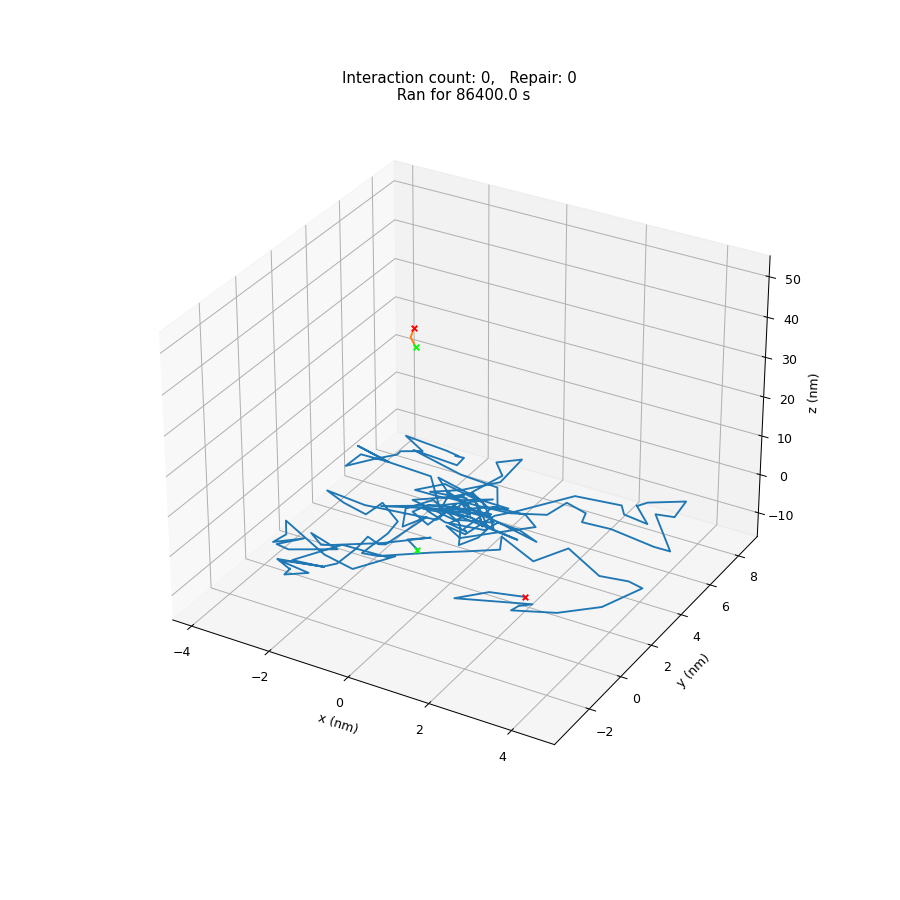

In [13]:
#min_dist  = 50  # in nm
interaction_range = 25  # in nm 
interaction_probability = 1

alpha = 0.5
D = 2.8e11  # nm^2/s
jump_t = 1e-12  # jump time in s
min_t = 0.1  # minimum waiting time in s
run_t = 86400  # simulation run time in s
delay_t = 2.5  # initial delay time in s

ts,xyzs,counts,repair,df1,df2 = ctrw_3d_interaction([(0,0,0),(0,0,interaction_range*2)], D, jump_t, run_t, min_t, alpha,
                                                    interaction_range, delay_t, interaction_p=interaction_probability,
                                                    plot=1, return_trajectories=True)

In [14]:
def ctrw_3d_interaction_mc(nsamples, initial_pos, diff_coeff, diff_time, run_time, min_wait_time, anom_diff_exp,
                           int_length, delay_time, interaction_p=1, plot=0):
    
    j = 0
    
    for i in np.arange(nsamples):
        
        ts_temp,xyzs_temp,counts_temp,repair_temp = ctrw_3d_interaction(initial_pos, diff_coeff, diff_time, run_time,
                                                                        min_wait_time, anom_diff_exp, int_length, 
                                                                        delay_time, interaction_p=interaction_p, plot=plot)
     
        repair_temp = np.reshape(repair_temp,(len(repair_temp),1))
        counts_temp = np.reshape(counts_temp,(np.size(counts_temp),1))
        
        if counts_temp[0] != 0:
        
            mc_sample = np.full((len(counts_temp),1),i)

            data_temp = np.hstack((mc_sample,ts_temp,xyzs_temp,counts_temp,repair_temp))

            if j == 0:
                repair_data = data_temp

            else: 
                repair_data = np.vstack((repair_data,data_temp))
                
            j+=1
                
    if j != 0:
        repair_df = pd.DataFrame(data=repair_data, columns=['mc_step', 't','x1','y1','z1','x2','y2','z2','interaction','repair'])
    
    else:
        repair_df = pd.DataFrame()
        
    return repair_df


In [15]:
repair_data = ctrw_3d_interaction_mc(100,[(0,0,0),(0,0,interaction_range*1)], D, jump_t, run_t, min_t, 0.5,
                                       interaction_range, delay_t, interaction_p=1, plot=0)

In [17]:
repair_data

,mc_step,t,x1,y1,z1,x2,y2,z2,interaction,repair
0,0.0,4.855369,-1.198852,-0.902440,0.240967,0.792869,0.804031,25.021483,1.0,1.0
1,1.0,72.707038,-1.118690,0.682448,-1.996250,-3.182092,-0.016643,22.368658,1.0,1.0
2,2.0,4.982130,-3.034301,-1.167462,0.031224,0.148804,0.175330,24.477944,1.0,1.0
3,3.0,90.497777,-4.152731,1.362085,-2.713551,-3.664800,-0.536241,22.142431,1.0,1.0
4,4.0,8.826211,3.582979,-0.208759,1.203670,1.613229,0.132914,25.981613,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...
81,95.0,20.932329,-0.241826,0.321996,0.546941,0.447719,1.610100,25.150797,1.0,1.0
82,96.0,2.522335,-2.512652,-0.927490,2.706907,0.956370,-2.904510,25.614005,1.0,1.0
83,97.0,3.107868,1.042782,0.654956,-0.959564,-1.393572,-0.924491,23.615713,1.0,1.0
84,98.0,2.568578,-0.806573,0.726172,-0.665734,-0.773193,-0.207917,23.119038,1.0,1.0


In [18]:
repair_events = repair_data[repair_data['repair']==1.0]
print('Shortest repair time recorded (should be >{}) : {}'.format(delay_t, min(repair_events['t'])))
print('Longest repair time recorded (should be <{}) : {}'.format(run_t, max(repair_events['t'])))

Shortest repair time recorded (should be >2.5) : 2.5223350170120185
Longest repair time recorded (should be <86400) : 24995.97511123085


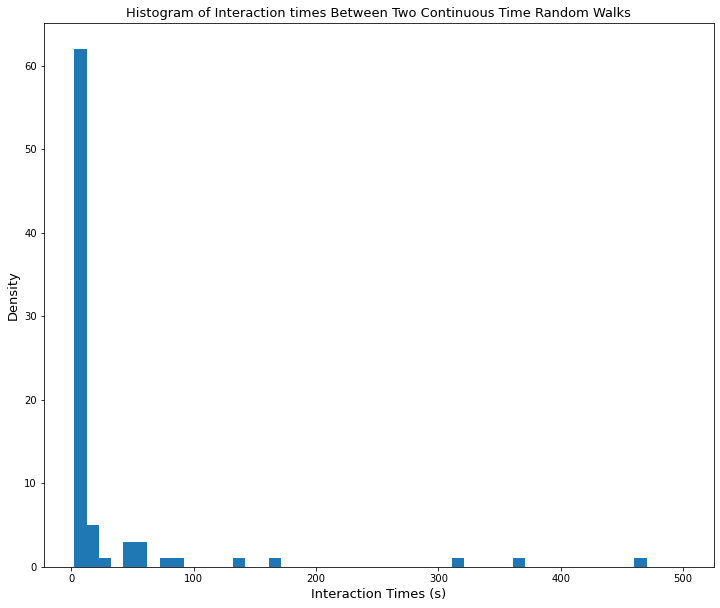

In [19]:
%matplotlib inline
fig,ax = plt.subplots(figsize=(12,10))
ax.hist(repair_data['t'], bins=50,range=(2.5,500))
ax.set_xlabel('Interaction Times (s)',fontsize=13)
ax.set_ylabel('Density',fontsize=13)
plt.title('Histogram of Interaction times Between Two Continuous Time Random Walks',fontsize=13)

plt.show()

In [20]:
# repair_events = repair_data[repair_data['repair']==1.0]
# repair_count = repair_events['interaction']
# fig,ax = plt.subplots(figsize=(10,10))
# plt.hist(repair_count,bins='auto',range=(0,max(repair_count)))
# ax.set_xlabel('Number of Interactions',fontsize=13)
# ax.set_ylabel('Density',fontsize=13)
# plt.title('Histogram of Number of Interactions Before Repair\n (Interaction Probability {})'.format(interaction_probability),
#           fontsize=13)

# print('Repaired {} / {} within run time {} s'.format(len(repair_events), 1+int(repair_data['mc_step'].iat[-1]), run_t))
# print('Mean no. of interactions before repair: {:.3f}'.format(np.mean(repair_count)))

In [21]:
def ctrw_interaction_mc_D(nsamples_per_D, repeats, initial_pos, diff_coeffs, diff_time, run_time, min_wait_time, anom_diff_exp,
                          int_length, delay_time, interaction_p=1, plot=0):
    
    repair_avgs = np.empty(len(diff_coeffs))
    repair_stds = np.empty(len(diff_coeffs))
    
    for k,D in enumerate(diff_coeffs):
        
        temp_repair_rates = np.empty(repeats)
        
        for i in np.arange(repeats):
            
            data = ctrw_3d_interaction_mc(nsamples_per_D, initial_pos, D, diff_time, run_time, min_wait_time, anom_diff_exp,
                                          int_length, delay_time, interaction_p=interaction_p, plot=plot)
           # print(data)
            if len(data.index) == 0:
                temp_repair_rates[i] = np.NaN
            else:  
                repair_events = len(data[data['repair']==1.0])
                temp_repair_rates[i] = repair_events
            
        repair_avgs[k] = np.nanmean(temp_repair_rates)
        repair_stds[k] = np.nanstd(temp_repair_rates)
        
    return repair_avgs, repair_stds

def ctrw_interaction_mc_D_r(nsamples_per_D, repeats, separations, diff_coeffs, diff_time, run_time, min_wait_time, anom_diff_exp,
                           int_length, delay_time, interaction_p=1, plot=0):
    
    N_rows = int(len(diff_coeffs)*len(separations))
    print(N_rows)
    
    repair_data_D_r = np.empty((N_rows,4)) 

    
    for j,r in enumerate(separations):
        
        print('-----')
        
        initial_pos = [(0,0,0),(0,0,r)]
                                 
        repair_avgs = np.empty(len(diff_coeffs))
        repair_stds = np.empty(len(diff_coeffs))
    
        for k,D in enumerate(diff_coeffs):
            
            print(j*len(diff_coeffs)+k)
            print(r,D)

            temp_repair_rates = np.empty(repeats)

            for i in np.arange(repeats):
                
                data = ctrw_3d_interaction_mc(nsamples_per_D, initial_pos, D, diff_time, run_time, min_wait_time, anom_diff_exp,
                                              int_length, delay_time, interaction_p=interaction_p, plot=plot)
               # print(data)
                if len(data.index) == 0:

                    temp_repair_rates[i] = 0
                else:  
                    repair_events = len(data[data['repair']==1.0])
                    temp_repair_rates[i] = repair_events

            repair_avg = np.nanmean(temp_repair_rates)
            repair_std = np.nanstd(temp_repair_rates)
            
            repair_data_row = np.array([r,D,repair_avg,repair_std])
            repair_data_D_r[j*len(diff_coeffs)+k] = repair_data_row

            
    repair_df_D_r = pd.DataFrame(data=repair_data_D_r, columns=['r','D','Repair Rate','Repair Rate Std'])                 
        
    return repair_df_D_r

In [43]:
D_vals = 2.8*np.logspace(7,17,num=11)
# repair_avgs,repair_stds = ctrw_interaction_mc_D(50,3,[(0,0,0),(0,0,i1)], D_vals, jump_t, run_t, min_t, 0.5,
#                                                 interaction_range)
repair_avgs,repair_stds = ctrw_interaction_mc_D(50,3,[(0,0,0),(0,0,interaction_range*1)], D_vals, jump_t, run_t, min_t, 0.5,
                                                interaction_range, delay_t)

<ipython-input-42-8e88d9b72d2c>:22: RuntimeWarning: Mean of empty slice
  repair_avgs[k] = np.nanmean(temp_repair_rates)
C:\Users\PaulV\AppData\Roaming\Python\Python38\site-packages\numpy\lib\nanfunctions.py:1878: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


In [44]:
print(repair_avgs,repair_stds)

[45.         47.33333333 48.66666667 44.33333333 44.66666667 41.33333333
 27.33333333  6.                 nan         nan         nan] [0.81649658 0.94280904 0.47140452 1.24721913 2.05480467 2.05480467
 1.69967317 1.63299316        nan        nan        nan]


Text(0, 0.5, 'Repair Rate')

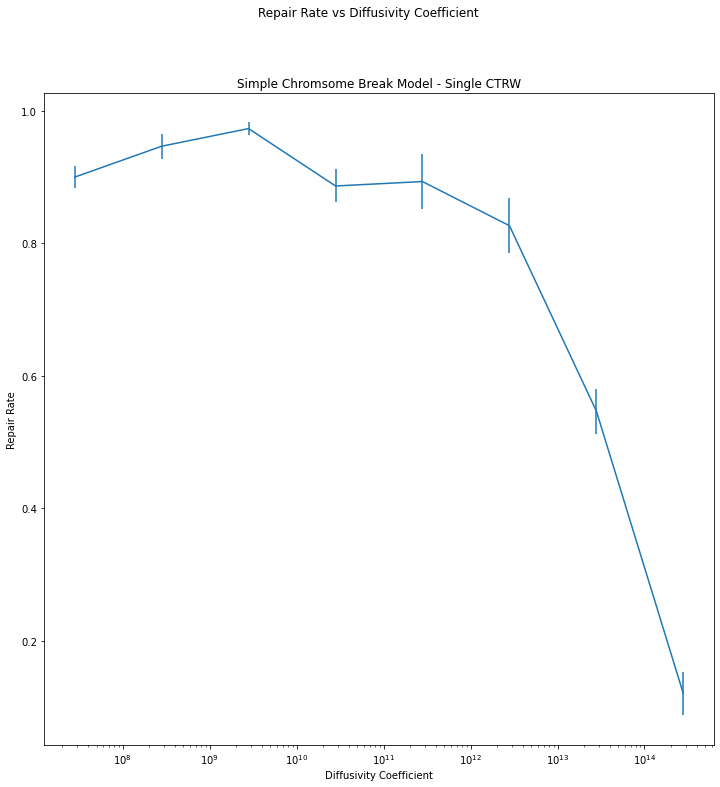

In [45]:
fig,ax = plt.subplots(figsize=(12,12))
plt.suptitle('Repair Rate vs Diffusivity Coefficient')
plt.title('Simple Chromsome Break Model - Single CTRW')
plt.errorbar(x=D_vals,y=repair_avgs/50,yerr=repair_stds/50)
ax.set_xscale('log')
ax.set_xlabel('Diffusivity Coefficient')
ax.set_ylabel('Repair Rate')

In [47]:
r_vals = np.arange(interaction_range*0.5,interaction_range*3.5,0.5*interaction_range)
D_vals = 2.8*np.logspace(7,16,num=10)

repair_df_D_r = ctrw_interaction_mc_D_r(10, 3, r_vals, D_vals, jump_t, run_t, min_t, 0.5, interaction_range, delay_t, 
                                        interaction_p = 1)

60
-----
0
12.5 28000000.0
1
12.5 280000000.0
2
12.5 2800000000.0
3
12.5 28000000000.0
4
12.5 280000000000.0
5
12.5 2800000000000.0
6
12.5 28000000000000.0
7
12.5 279999999999999.97
8
12.5 2800000000000000.0
9
12.5 2.8e+16
-----
10
25.0 28000000.0
11
25.0 280000000.0
12
25.0 2800000000.0
13
25.0 28000000000.0
14
25.0 280000000000.0
15
25.0 2800000000000.0
16
25.0 28000000000000.0
17
25.0 279999999999999.97
18
25.0 2800000000000000.0
19
25.0 2.8e+16


KeyboardInterrupt: 

In [48]:
print(len(D_vals),len(r_vals))
repair_df_D_r

10 6


,r,D,Repair Rate,Repair Rate Std
0,12.5,2.800000e+07,10.000000,0.000000
1,12.5,2.800000e+08,9.666667,0.471405
2,12.5,2.800000e+09,9.666667,0.471405
3,12.5,2.800000e+10,10.000000,0.000000
4,12.5,2.800000e+11,10.000000,0.000000
5,12.5,2.800000e+12,10.000000,0.000000
6,12.5,2.800000e+13,5.666667,1.247219
7,12.5,2.800000e+14,1.333333,0.471405
8,12.5,2.800000e+15,0.000000,0.000000
9,12.5,2.800000e+16,0.000000,0.000000


In [22]:
def plot_3d(repair_df_D_r, r_vals,D_vals,reps):
    
   # h_dict = get_dict_from_file(file_name, window, all_step_sizes, restriction)
    
    %matplotlib notebook
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(projection="3d")
    cmap = plt.cm.plasma
    
    steps = [int(r) for r in r_vals]
    
    for i,r in enumerate(r_vals):
        ytick = r
        
        #temp_counts = norm_counts[i]
        #temp_bins = bins[i]
        #xcenter = np.convolve(temp_bins, np.ones(2), "valid")/2
        #xwidth = np.diff(temp_bins)
        
        #ax.bar(left=xcenter, height=temp_counts, width=xwidth, zs=ytick,
         #      zdir="y", color=cmap(i/len(yticks)), alpha=0.7, edgecolor="grey", linewidth=0.3)
        
        print(len(D_vals),len(repair_avgs))
        data = repair_df_D_r[repair_df_D_r['r']==r]
        
        ax.errorbar(x=data['D'],y=data['Repair Rate']/reps,yerr=data['Repair Rate Std']/reps,color=cmap(i/len(r_vals)))
        
        ax.set_xscale('log')
        ax.set_xlabel('Diffusivity Coefficient')

        plt.fill_between(
                x= data['D'], 
                y1= data['Repair Rate']/reps ,
                where= (10e6 <= data['D'])&(data['D'] < 10e16),
                color= "b",
                alpha= 0.2)

        ax.set_ylabel('Repair Rate')
        ax.set_xscale('log')
        ax.set_xlabel('Diffusivity Coefficient')


    ax.set_ylabel("Initial Separation")
    ax.set_zlabel("Repair Rate")

    ax.set_yticks(r_vals)
    plt.show()
    

def plot_r_and_D_subplots(repair_df_D_r,reps,r_vals):
    
    fig,axes = plt.subplots(2,3,figsize=(14,10))
    plt.suptitle('Repair Rate vs Diffusivity Coefficient For Varying Initial Separations')
    for i,r in enumerate(r_vals):

        data = repair_df_D_r[repair_df_D_r['r']==r]

        axes.flat[i].errorbar(x=data['D'],y=data['Repair Rate']/reps,yerr=data['Repair Rate Std']/reps)
        axes.flat[i].set_xscale('log')
        axes.flat[i].set_xlabel('Diffusivity Coefficient')
        axes.flat[i].set_ylabel('Repair Rate')
        
        axes.flat[i].set_title('Initial Separation: {} nm'.format(r))
    
def plot_r_and_D(repair_df_D_r,reps,r_vals):
    
    fig,ax = plt.subplots(figsize=(14,10))
    plt.suptitle('Repair Rate vs Diffusivity Coefficient For Varying Initial Separations')
    for i,r in enumerate(r_vals):

        data = repair_df_D_r[repair_df_D_r['r']==r]

        #area = scipy.integrate.simpson(data['Repair Rate']/reps, x=data['D'], axis=-1, even='avg')
        ax.errorbar(x=data['D'],y=data['Repair Rate']/reps,
                    yerr=data['Repair Rate Std']/reps,label='Initial Separation: {} nm, Area Under Curve: {}'.format(r,'area'))
        ax.set_xscale('log')
        ax.set_xlabel('Diffusivity Coefficient')
        ax.set_ylabel('Repair Rate')
        ax.legend()
        

    
plot_r_and_D_subplots(repair_df_D_r,100,r_vals)
plot_r_and_D(repair_df_D_r,100,r_vals)
    

NameError: name 'repair_df_D_r' is not defined

## 4 CTRW Simulation - 2 break sites , 2 break ends each

In [23]:
def repair_process(interaction_index):
    """
    Updated Function to also consider misrepairs
    """
    repair = 1
    
    #index 0 = i12, index 5 = i34, which are ends of same pair
    # if not these indices, misrepair between diff strands
    if interaction_index != 0 and interaction_index != 5:
        repair = -1
        
    return repair

In [24]:
def gauss_step_3d_v2(xyz_array, diff_coeff, diff_time):
    
    new_coords = np.zeros(3)
    
    xyz_array_row = xyz_array[-1]
    
#     xyz_array = np.vstack((xyz_array, xyz_array_row))

    for i,x_i in enumerate(xyz_array_row):
        
        new_coords[i] = x_i + gaussian_step(diff_coeff,diff_time)
        
    xyz_array = np.vstack((xyz_array,new_coords))
    return xyz_array

def gauss_step_3d_pair(xyz_array1, xyz_array2, diff_coeff, diff_time):
    
    new_coords1 = np.zeros(3)
    new_coords2 = np.zeros(3)
    
    xyz_array_row1 = xyz_array1[-1]
    xyz_array_row2 = xyz_array2[-1]
    
#     xyz_array1 = np.vstack((xyz_array1, xyz_array_row1))
#     xyz_array2 = np.vstack((xyz_array2, xyz_array_row2))
    
    # two particles move together
    for i in range(3):
        dx = gaussian_step(diff_coeff, diff_time)
        new_coords1[i] = xyz_array_row1[i] + dx
        new_coords2[i] = xyz_array_row2[i] + dx
        
    xyz_array1 = np.vstack((xyz_array1, new_coords1))
    xyz_array2 = np.vstack((xyz_array2, new_coords2))
    
    return xyz_array1, xyz_array2


def take_step_coupled_ctrw(sim_clock, move_index, coords1, coords2, coords3, coords4, D_break_sites, D_break_ends, diff_time,
                           run_time, min_wait_time, anom_diff_exp):
    """
    Depending on move_index, either one of the break ends will move individually (smaller motion) or the 
    two break ends of one break site will move together (bigger motion).
    """
    
    if move_index==0:
        # break end 1 moves (smaller motion)
        coords1 = gauss_step_3d_v2(coords1, D_break_ends, diff_time)
        # ends 2,3,4 stay
        coords2 = np.vstack((coords2, coords2[-1]))
        coords3 = np.vstack((coords3, coords3[-1]))
        coords4 = np.vstack((coords4, coords4[-1]))
        
    elif move_index==1:
        # break end 2 moves (smaller motion)
        coords2 = gauss_step_3d_v2(coords2, D_break_ends, diff_time)
        # ends 1,3,4 stay
        coords1 = np.vstack((coords1, coords1[-1]))
        coords3 = np.vstack((coords3, coords3[-1]))
        coords4 = np.vstack((coords4, coords4[-1]))
        
    elif move_index==2:
        # break end 3 moves (smaller motion)
        coords3 = gauss_step_3d_v2(coords3, D_break_ends, diff_time)
        # ends 1,2,4 stay
        coords1 = np.vstack((coords1, coords1[-1]))
        coords2 = np.vstack((coords2, coords2[-1]))
        coords4 = np.vstack((coords4, coords4[-1]))
    
    elif move_index==3:
        # break end 4 moves (smaller motion)
        coords4 = gauss_step_3d_v2(coords4, D_break_ends, diff_time)
        # ends 1,2,3 stay
        coords1 = np.vstack((coords1, coords1[-1]))
        coords2 = np.vstack((coords2, coords2[-1]))
        coords3 = np.vstack((coords3, coords3[-1]))
        
    elif move_index==4:
        # break site 12 moves (bigger motion) - ends 1 and 2 move together        
        coords1, coords2 = gauss_step_3d_pair(coords1, coords2, D_break_sites, diff_time)
        # ends 3,4 stay
        coords3 = np.vstack((coords3, coords3[-1]))
        coords4 = np.vstack((coords4, coords4[-1]))
        
    elif move_index==5:
        # break site 34 moves (bigger motion) - ends 3 and 4 move together        
        coords3, coords4 = gauss_step_3d_pair(coords3, coords4, D_break_sites, diff_time)
        # ends 1,2 stay
        coords1 = np.vstack((coords1, coords1[-1]))
        coords2 = np.vstack((coords2, coords2[-1]))
    
    return coords1, coords2, coords3, coords4


def check_for_interaction(sim_t, c1, c2, c3, c4, int_range, int_in, delay_time):
    """
    sim_t is current simulation time
    Assumed all interactions result in repair/misrepair.
    Function to take positions, times and check for repair.
    t1-t4 are current walk times, c1-c4 are their coordinates xyz
    int_range is interaction range, int_in is exisiting interaction array
    int_in has form: [i12,i13,i14,i23,i24,i34,repair]
    where i12 is a tally of interactions between 1 and 2 etc, repair is 1,0,-1
    for repair, no repair, or misrepair
    """
    #array of combinations of times and coordinates to iterate through later
    coords = np.array([[c1,c2],[c1,c3],[c1,c4],[c2,c3],[c2,c4],[c3,c4]],dtype=object)
    distances = np.zeros(6)
    
    for i,cc in enumerate(coords):
        distances[i] = get_distance_3d(cc[0],cc[1])
        
    # use minimum distance to check for interaction between the two nearest particles
    min_dist = np.min(distances)
    interaction_index = np.argmin(distances)
    
    repair = 0
    int_t = 0
    int_out = int_in
        
    if min_dist < int_range and sim_t > delay_time:
        repair = repair_process(interaction_index)
        int_t = sim_t  # interaction time is the current simulation time
        int_out[-1] = repair
        int_out[interaction_index] = 1
                 
    return int_t, int_out, repair


def coupled_ctrw(initial_pos, D_break_sites, D_break_ends, diff_time, run_time, min_wait_time, anom_diff_exp, int_length,
                 delay_time, plot=False):
    """
    All interactions result in repair/misrepair.
    Separation of the two break ends of one DSB is assumed to be 0.
    initial_pos: 2d array, e.g. [(x1,y1,z1), (x2,y2,z2)], describes initial positions of the two break sites
    """    
    # ends of first break site
    x1, y1, z1 = initial_pos[0]
    x2, y2, z2 = initial_pos[0]
    
    # ends of second break site
    x3, y3, z3 = initial_pos[1]
    x4, y4, z4 = initial_pos[1]
    
    coords1 = np.array([[x1, y1, z1]])
    coords2 = np.array([[x2, y2, z2]])
    coords3 = np.array([[x3, y3, z3]])
    coords4 = np.array([[x4, y4, z4]])
    
    #possible correct repair counts
    i12,i34 = 0,0
    #possible misrepair counts
    i13,i14,i23,i24 = 0,0,0,0
    
    repair = 0 
    int_t = 0
    #int_arr = np.array([int_t,i12,i13,i14,i23,i24,i34,repair])
    int_arr = np.array([i12,i13,i14,i23,i24,i34,repair])
    # keep int_t separate from int_arr, otherwise it will get rounded to integer
    
    individual_clocks = np.zeros(6)
    for i in range(6):
        individual_clocks[i] = get_waiting_time(min_wait_time, anom_diff_exp)
    
    sim_clock = 0  # current time in the simulation (for all particles)
    sim_times = np.array([0])  # time array to be used for all particles
    
    while sim_clock < run_time and repair == 0:
        
        sim_clock = min(individual_clocks)
        move_index = np.argmin(individual_clocks)
        
        # record current simulation time
        sim_times = np.append(sim_times, sim_clock)
        # record position of each particle at this simulation time
        coords1, coords2, coords3, coords4 = take_step_coupled_ctrw(sim_clock, move_index, coords1, coords2, coords3, coords4,
                                                                    D_break_sites, D_break_ends, diff_time, run_time,
                                                                    min_wait_time, anom_diff_exp)
        
        c1, c2, c3, c4 = coords1[-1], coords2[-1], coords3[-1], coords4[-1]
        
        int_t, int_arr, repair = check_for_interaction(sim_clock, c1, c2, c3, c4, int_length, int_arr, delay_time)
        
        # update relevant individual clock
        waiting_t = get_waiting_time(min_wait_time, anom_diff_exp)
        individual_clocks[move_index] += waiting_t
       
    
    data1 = {'t': sim_times, 'x': coords1[:,0], 'y': coords1[:,1], 'z': coords1[:,2]}
    df1 = pd.DataFrame(data1)
    data2 = {'t': sim_times, 'x': coords2[:,0], 'y': coords2[:,1], 'z': coords2[:,2]}
    df2 = pd.DataFrame(data2)
    data3 = {'t': sim_times, 'x': coords3[:,0], 'y': coords3[:,1], 'z': coords3[:,2]}
    df3 = pd.DataFrame(data3)
    data4 = {'t': sim_times, 'x': coords4[:,0], 'y': coords4[:,1], 'z': coords4[:,2]}
    df4 = pd.DataFrame(data4)

    if plot:              
        %matplotlib notebook
        fig = plt.figure(figsize=(10,10))
        ax = plt.axes(projection ='3d')
        ax.plot3D(df1['x'], df1['y'], df1['z'], c='b', label='end 1')
        ax.plot3D(df2['x'], df2['y'], df2['z'], c='cyan', ls='dotted', label='end 2')
        ax.plot3D(df3['x'], df3['y'], df3['z'], c='g', label='end 3')
        ax.plot3D(df4['x'], df4['y'], df4['z'], c='lime', ls='dotted', label='end 4')
        ax.set_title('Repair: {} \n Ran for {} s'.format(repair, sim_clock))
        ax.set_xlabel('x (nm)')
        ax.set_ylabel('y (nm)')
        ax.set_zlabel('z (nm)')
        ax.scatter(df1['x'].iat[-1], df1['y'].iat[-1], df1['z'].iat[-1], marker='x', c='red', label='start')
        ax.scatter(df2['x'].iat[-1], df2['y'].iat[-1], df2['z'].iat[-1], marker='x', c='red')
        ax.scatter(df3['x'].iat[-1], df3['y'].iat[-1], df3['z'].iat[-1], marker='x', c='red')
        ax.scatter(df4['x'].iat[-1], df4['y'].iat[-1], df4['z'].iat[-1], marker='x', c='red')
        ax.scatter(df1['x'][0], df1['y'][0], df1['z'][0], marker='x', c='black', label='finish')
        ax.scatter(df2['x'][0], df2['y'][0], df2['z'][0], marker='x', c='black')
        ax.scatter(df3['x'][0], df3['y'][0], df3['z'][0], marker='x', c='black')
        ax.scatter(df4['x'][0], df4['y'][0], df4['z'][0], marker='x', c='black')
        ax.legend()

    return int_t, int_arr, df1, df2, df3, df4

def coupled_ctrw_for_mc(initial_pos, D_break_sites, D_break_ends, diff_time, run_time, min_wait_time, anom_diff_exp, int_length,
                 delay_time, plot=False):
    """
    All interactions result in repair/misrepair.
    Separation of the two break ends of one DSB is assumed to be 0.
    initial_pos: 2d array, e.g. [(x1,y1,z1), (x2,y2,z2)], describes initial positions of the two break sites
    """    
    # ends of first break site
    x1, y1, z1 = initial_pos[0]
    x2, y2, z2 = initial_pos[0]
    
    # ends of second break site
    x3, y3, z3 = initial_pos[1]
    x4, y4, z4 = initial_pos[1]
    
    coords1 = np.array([[x1, y1, z1]])
    coords2 = np.array([[x2, y2, z2]])
    coords3 = np.array([[x3, y3, z3]])
    coords4 = np.array([[x4, y4, z4]])
    
    #possible correct repair counts
    i12,i34 = 0,0
    #possible misrepair counts
    i13,i14,i23,i24 = 0,0,0,0
    
    repair = 0 
    int_t = 0
    #int_arr = np.array([int_t,i12,i13,i14,i23,i24,i34,repair])
    int_arr = np.array([i12,i13,i14,i23,i24,i34,repair])
    # keep int_t separate from int_arr, otherwise it will get rounded to integer
    
    individual_clocks = np.zeros(6)
    for i in range(6):
        individual_clocks[i] = get_waiting_time(min_wait_time, anom_diff_exp)
    
    sim_clock = 0  # current time in the simulation (for all particles)
    sim_times = np.array([0])  # time array to be used for all particles
    
    while sim_clock < run_time and repair == 0:
        
        sim_clock = min(individual_clocks)
        move_index = np.argmin(individual_clocks)
        
        # record current simulation time
        sim_times = np.append(sim_times, sim_clock)
        # record position of each particle at this simulation time
        coords1, coords2, coords3, coords4 = take_step_coupled_ctrw(sim_clock, move_index, coords1, coords2, coords3, coords4,
                                                                    D_break_sites, D_break_ends, diff_time, run_time,
                                                                    min_wait_time, anom_diff_exp)
        
        c1, c2, c3, c4 = coords1[-1], coords2[-1], coords3[-1], coords4[-1]
        
        int_t, int_arr, repair = check_for_interaction(sim_clock, c1, c2, c3, c4, int_length, int_arr, delay_time)
        
        # update relevant individual clock
        waiting_t = get_waiting_time(min_wait_time, anom_diff_exp)
        individual_clocks[move_index] += waiting_t

    return int_t, int_arr

In [25]:
#interaction_range = 25  # in nm 
#interaction_probability = 1

alpha = 0.5
D_ends = 2.8e14  # nm^2/s
D_sites = 2.8e15  #nm^2/s
jump_t = 1e-12  # jump time in s
min_t = 0.1  # minimum waiting time in s
run_t = 86400  # simulation run time in s
delay_t = 2.5  # initial delay time in s

int_length = 25
#strand_length = 100
separation = 500

<IPython.core.display.Javascript object>


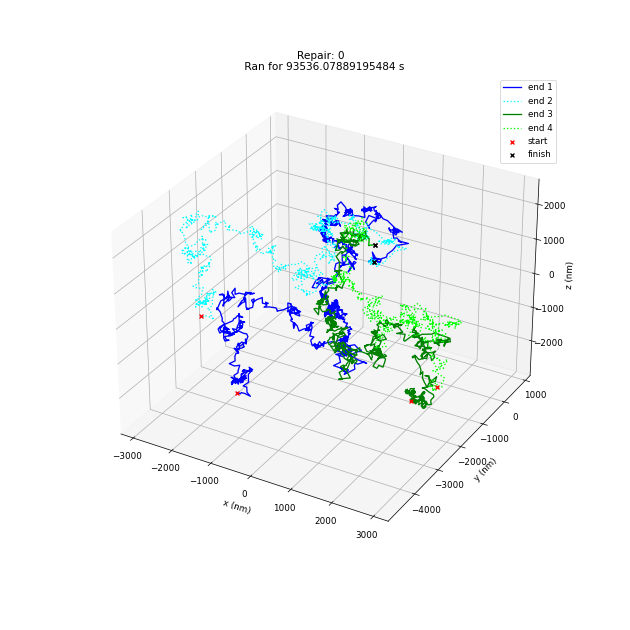

0
[0 0 0 0 0 0 0]


In [190]:
rep_t, rep_arr, df1, df2, df3, df4 = coupled_ctrw([(0,0,0),(0,0,separation)], D_sites, D_ends, jump_t, run_t, min_t, alpha,
                                                  int_length, delay_t, plot=True)
print(rep_t)
print(rep_arr)


In [26]:
def ctrw4_interaction_mc(nsamples, initial_pos, D_sites,D_ends, diff_time, run_time, min_wait_time, anom_diff_exp,
                           int_length, delay_time, interaction_p=1, plot=False):
    
    mc_repair_arr = np.zeros((nsamples,11))
    
    for i in np.arange(nsamples):

        rep_t, rep_arr = coupled_ctrw_for_mc([(0,0,0),(0,0,separation)], D_sites, D_ends, jump_t, run_t, min_t, alpha,
                                                  int_length, delay_t, plot=False)
    
        mc_repair_arr[i][0] = i
        mc_repair_arr[i][1] = D_sites
        mc_repair_arr[i][2] = D_ends
        mc_repair_arr[i][3:-1] = rep_arr
        mc_repair_arr[i][-1] = rep_t
        
    repair_df = pd.DataFrame(data=mc_repair_arr, columns=['mc_step','D_sites','D_ends',
                                                        'i12','i13','i14','i23','i24','i34','repair','repair_t'])
    return repair_df

def ctrw4_De_Ds_mc(samples_per_rep,repeats, initial_pos, D_sites,D_ends, diff_time, run_time, min_wait_time, 
                         anom_diff_exp,int_length, delay_time, interaction_p=1, plot=False):
    
    nrows = len(D_sites)*len(D_ends)
    repair_data_De_Ds = np.zeros((nrows,6))
    
    print(nrows)
    
    for j,De in enumerate(D_ends):
        
        print('----------------')
             
        repair_avgs = np.empty(len(D_sites))
        repair_stds = np.empty(len(D_sites))
    
        for k,Ds in enumerate(D_sites):
            
            print(j*len(D_sites)+k)
            print(De,Ds)

            repair_rates = np.zeros(repeats)
            misrepair_rates = np.zeros(repeats)

            for i in np.arange(repeats):
                
                data = ctrw4_interaction_mc(samples_per_rep, initial_pos, Ds,De, 
                                            diff_time, run_time, min_wait_time, anom_diff_exp,
                                            int_length, delay_time, interaction_p=interaction_p)
                

                repair_events = len(data[data['repair']==1.0])
                misrepair_events = len(data[data['repair']==-1.0])
                repair_rates[i] = repair_events
                misrepair_rates[i] = misrepair_events

            repair_avg = np.nanmean(repair_rates)
            misrepair_avg = np.nanmean(misrepair_rates)
            
            repair_std = np.nanstd(repair_rates)
            misrepair_std = np.nanstd(misrepair_rates)
            
            repair_data_row = np.array([De,Ds,repair_avg,repair_std,misrepair_avg,misrepair_std])
            repair_data_De_Ds[j*len(D_sites)+k] = repair_data_row
            
    repair_df_De_Ds = pd.DataFrame(data=repair_data_De_Ds, columns=['D_ends','D_sites','Repair Rate',
                                                                'Repair Rate Std','Misrepair Rate',
                                                                'Misrepair Rate Std']) 
    
    return repair_df_De_Ds

def print_full(df):
    pd.set_option('display.max_rows', None)
    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', 2000)
    pd.set_option('display.float_format', '{:20,.2f}'.format)
    pd.set_option('display.max_colwidth', None)
    display(df)
    pd.reset_option('display.max_rows')
    pd.reset_option('display.max_columns')
    pd.reset_option('display.width')
    pd.reset_option('display.float_format')
    pd.reset_option('display.max_colwidth')
    

In [27]:
mc_repair_df = ctrw4_interaction_mc(5, [(0,0,0),(0,0,separation)], D_sites,D_ends, jump_t, run_t, min_t, alpha,
                           int_length, delay_t, interaction_p=1)

mc_repair_df

,mc_step,D_sites,D_ends,i12,i13,i14,i23,i24,i34,repair,repair_t
0,0.0,2.800000e+15,2.800000e+14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,1.0,2.800000e+15,2.800000e+14,0.0,0.0,0.0,0.0,0.0,1.0,1.0,3.025791
2,2.0,2.800000e+15,2.800000e+14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,3.0,2.800000e+15,2.800000e+14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,4.0,2.800000e+15,2.800000e+14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [40]:
alpha = 0.5
D_ends = 2.8e14  # nm^2/s
D_sites = 2.8e15  #nm^2/s
jump_t = 1e-12  # jump time in s
min_t = 0.1  # minimum waiting time in s
run_t = 86400  # simulation run time in s
delay_t = 2.5  # initial delay time in s

int_length = 25 #nm
separation = 500 #nm

D_site_vals = 2.8*np.logspace(7,16,num=10)
D_end_vals = 2.8*np.logspace(7,16,num=10)

#repair_df_De_Ds = ctrw4_De_Ds_mc(1,100, [(0,0,0),(0,0,separation)], D_site_vals,D_end_vals, jump_t, run_t, min_t, 
 #                                alpha,int_length, delay_t, interaction_p=1, plot=False)

In [43]:
D_site_vals = 2.8*np.logspace(14,16,num=5)
D_end_vals = 2.8*np.logspace(14,16,num=5)

#repair_df_De_Ds = ctrw4_De_Ds_mc(1,1000, [(0,0,0),(0,0,separation)], D_site_vals,D_end_vals, jump_t, run_t, min_t, 
 #                                alpha,int_length, delay_t, interaction_p=1, plot=False)

In [59]:
df_7_16_1 = pd.read_csv('De_7_16_Ds_7_16.csv') 
df_14_16_2 = pd.read_csv('De_14_16_Ds_14_16.csv')  
df_14_16_4 = pd.read_csv('De_14_16_Ds_14_16_2.csv') 

In [78]:
def plot_De_and_Ds(repair_df_D_r,reps=1):
    
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(14,10))
    plt.suptitle('Repair and Misrepair Rate vs Break Site Diffusivity Coefficient For Varying Break End Diffusivity')
    
    De_vals = np.unique((repair_df_D_r['D_ends'].to_numpy()))
    print(De_vals)
    
    for i,De in enumerate(De_vals):

        data = repair_df_D_r[repair_df_D_r['D_ends']==De]

        #area = scipy.integrate.simpson(data['Repair Rate']/reps, x=data['D'], axis=-1, even='avg')
        #ax.errorbar(x=data['D'],y=data['Repair Rate'],
         #           yerr=data['Repair Rate Std']/reps,label='Initial Separation: {} nm, Area Under Curve: {}'.format(r,'area'))
        ax1.plot(data['D_sites'],data['Repair Rate']/reps,label='D_end = {}'.format(De))
        ax1.set_xscale('log')
        ax1.set_xlabel('Break Site Diffusivity Coefficient')
        ax1.set_ylabel('Repair Rate')
        
        ax2.plot(data['D_sites'],data['Misrepair Rate']/reps,label='D_end = {:.2e}'.format(De))
        ax2.set_xscale('log')
        ax2.set_xlabel('Break Site Diffusivity Coefficient')
        ax2.set_ylabel('Misrepair Rate')
        
        plt.legend()

def plot_De_and_Ds_subplots(repair_df_De_Ds,plot_dim_1=2,plot_dim_2=3,reps=1):
    
    fig,axes = plt.subplots(plot_dim_1,plot_dim_2,figsize=(16,10))
    plt.suptitle('Repair and Misrepair Rate vs Break Site Diffusivity Coefficient For Varying Break End Diffusivities')
    
    De_vals = np.unique((repair_df_De_Ds['D_ends'].to_numpy()))
    
    for i,De in enumerate(De_vals):

        data = repair_df_De_Ds[repair_df_De_Ds['D_ends']==De]

        axes.flat[i].plot(data['D_sites'],data['Repair Rate']/reps,color ='k',label='Repair Rate')
        axes.flat[i].plot(data['D_sites'],data['Misrepair Rate']/reps,
                          color='r',linestyle='dashed',label='Misepair Rate')
        
        axes.flat[i].set_xscale('log')
        
        if i == 0 or i==plot_dim_2:
            axes.flat[i].set_ylabel('Repair Rate')
        
        axes.flat[i].set_xlabel('Break Site Diffusivity Coefficient')
        axes.flat[i].set_title('D_ends: {:.2e} '.format(De))
        
        plt.legend()
        
        fig.tight_layout()

,Unnamed: 0,D_ends,D_sites,Repair Rate,Repair Rate Std,Misrepair Rate,Misrepair Rate Std
0,0,"28,000,000.00","28,000,000.00",1.00,0.00,0.00,0.00
1,1,"28,000,000.00","280,000,000.00",1.00,0.00,0.00,0.00
2,2,"28,000,000.00","2,800,000,000.00",1.00,0.00,0.00,0.00
3,3,"28,000,000.00","28,000,000,000.00",1.00,0.00,0.00,0.00
4,4,"28,000,000.00","280,000,000,000.00",1.00,0.00,0.00,0.00
5,5,"28,000,000.00","2,800,000,000,000.00",1.00,0.00,0.00,0.00
6,6,"28,000,000.00","28,000,000,000,000.00",1.00,0.00,0.00,0.00
7,7,"28,000,000.00","280,000,000,000,000.00",1.00,0.00,0.00,0.00
8,8,"28,000,000.00","2,800,000,000,000,000.00",1.00,0.00,0.00,0.00
9,9,"28,000,000.00","28,000,000,000,000,000.00",1.00,0.00,0.00,0.00


[2.8e+07 2.8e+08 2.8e+09 2.8e+10 2.8e+11 2.8e+12 2.8e+13 2.8e+14 2.8e+15
 2.8e+16]


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


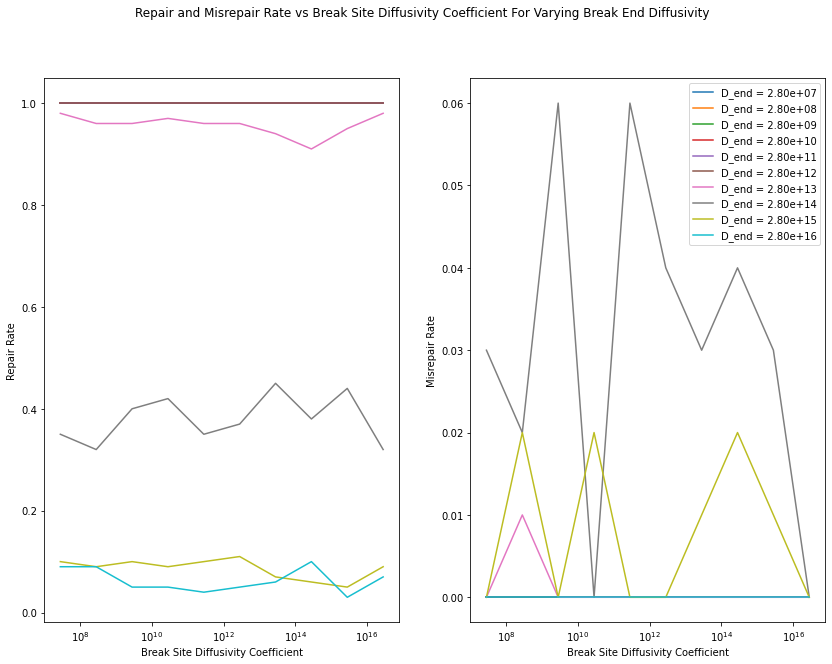

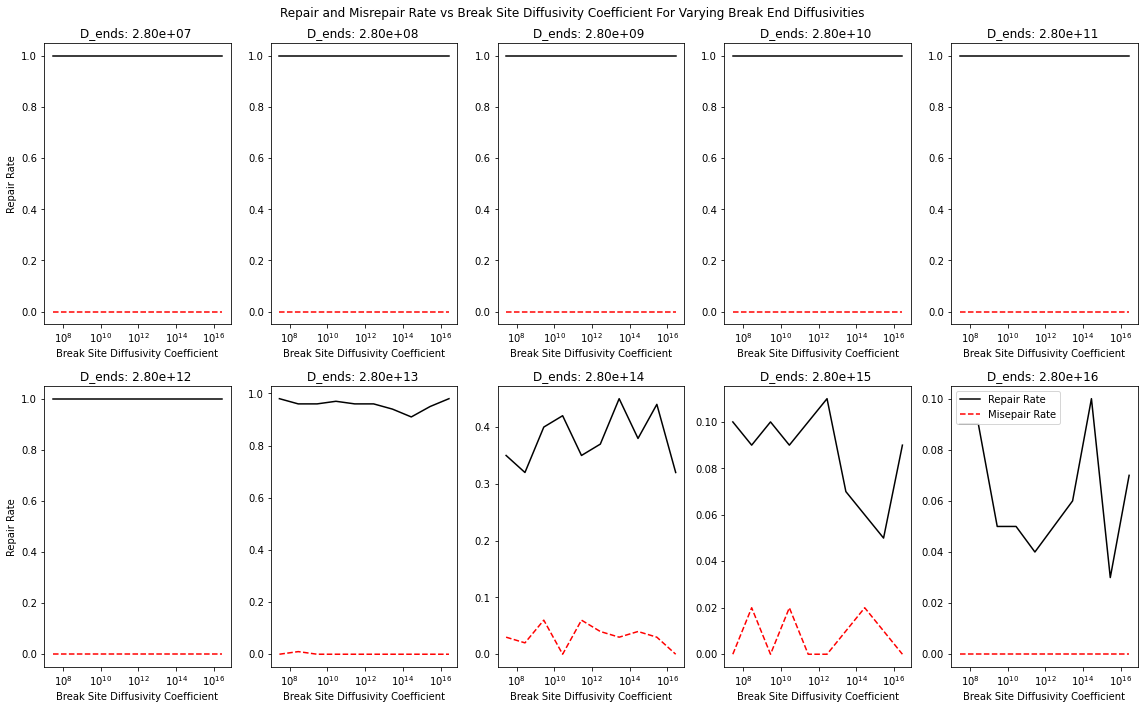

In [79]:
print_full(df_7_16_1)
plot_De_and_Ds(df_7_16_1)
plot_De_and_Ds_subplots(df_7_16_1,plot_dim_1=2,plot_dim_2=5)

,Unnamed: 0,D_ends,D_sites,Repair Rate,Repair Rate Std,Misrepair Rate,Misrepair Rate Std
0,0,"280,000,000,000,000.00","280,000,000,000,000.00",0.36,0.48,0.04,0.21
1,1,"280,000,000,000,000.00","885,437,744,847,146.12",0.37,0.48,0.04,0.19
2,2,"280,000,000,000,000.00","2,800,000,000,000,000.00",0.39,0.49,0.01,0.11
3,3,"280,000,000,000,000.00","8,854,377,448,471,462.00",0.37,0.48,0.00,0.06
4,4,"280,000,000,000,000.00","28,000,000,000,000,000.00",0.40,0.49,0.00,0.00
5,5,"885,437,744,847,146.12","280,000,000,000,000.00",0.18,0.39,0.03,0.18
6,6,"885,437,744,847,146.12","885,437,744,847,146.12",0.16,0.36,0.02,0.15
7,7,"885,437,744,847,146.12","2,800,000,000,000,000.00",0.17,0.37,0.02,0.13
8,8,"885,437,744,847,146.12","8,854,377,448,471,462.00",0.18,0.39,0.00,0.04
9,9,"885,437,744,847,146.12","28,000,000,000,000,000.00",0.16,0.37,0.01,0.08


No handles with labels found to put in legend.


[2.80000000e+14 8.85437745e+14 2.80000000e+15 8.85437745e+15
 2.80000000e+16]


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


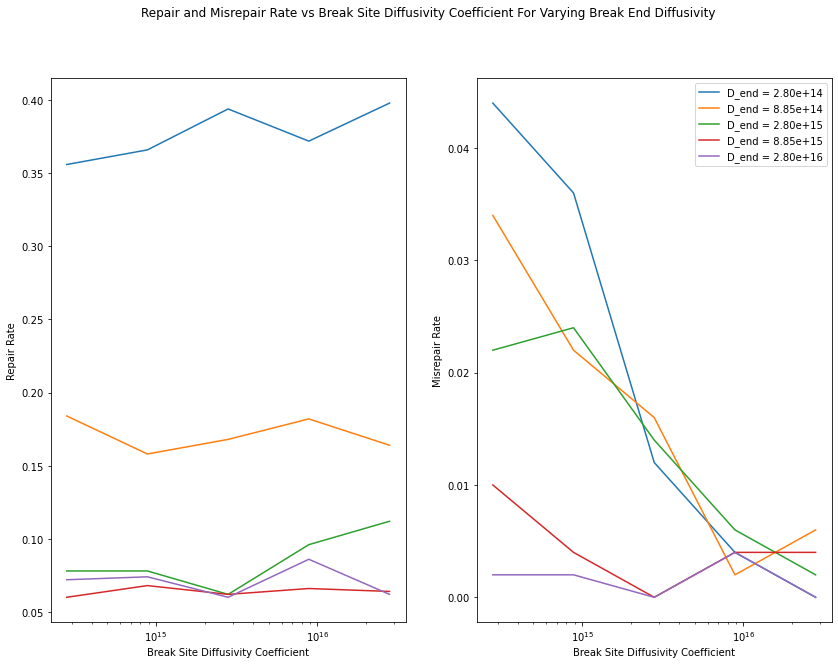

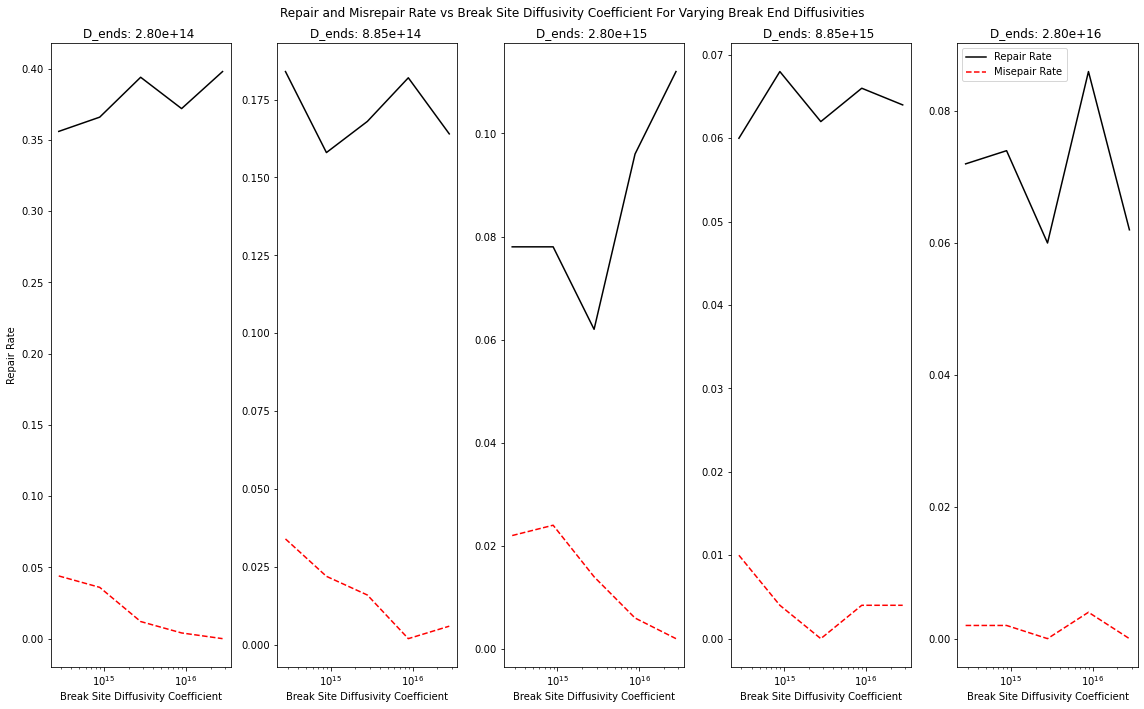

In [80]:
print_full(df_14_16_2)
plot_De_and_Ds(df_14_16_2)
plot_De_and_Ds_subplots(df_14_16_2,plot_dim_1=1,plot_dim_2=5)

,Unnamed: 0,D_ends,D_sites,Repair Rate,Repair Rate Std,Misrepair Rate,Misrepair Rate Std
0,0,"280,000,000,000,000.00","280,000,000,000,000.00",0.40,0.49,0.03,0.16
1,1,"280,000,000,000,000.00","497,918,234,810,898.38",0.39,0.49,0.04,0.19
2,2,"280,000,000,000,000.00","885,437,744,847,146.12",0.38,0.49,0.03,0.16
3,3,"280,000,000,000,000.00","1,574,555,710,532,977.25",0.39,0.49,0.02,0.13
4,4,"280,000,000,000,000.00","2,800,000,000,000,000.00",0.40,0.49,0.01,0.11
5,5,"280,000,000,000,000.00","4,979,182,348,108,983.00",0.37,0.48,0.00,0.06
6,6,"280,000,000,000,000.00","8,854,377,448,471,462.00",0.40,0.49,0.00,0.04
7,7,"280,000,000,000,000.00","15,745,557,105,329,774.00",0.41,0.49,0.00,0.06
8,8,"280,000,000,000,000.00","28,000,000,000,000,000.00",0.40,0.49,0.00,0.03
9,9,"497,918,234,810,898.38","280,000,000,000,000.00",0.24,0.43,0.04,0.20


[2.80000000e+14 4.97918235e+14 8.85437745e+14 1.57455571e+15
 2.80000000e+15 4.97918235e+15 8.85437745e+15 1.57455571e+16
 2.80000000e+16]


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


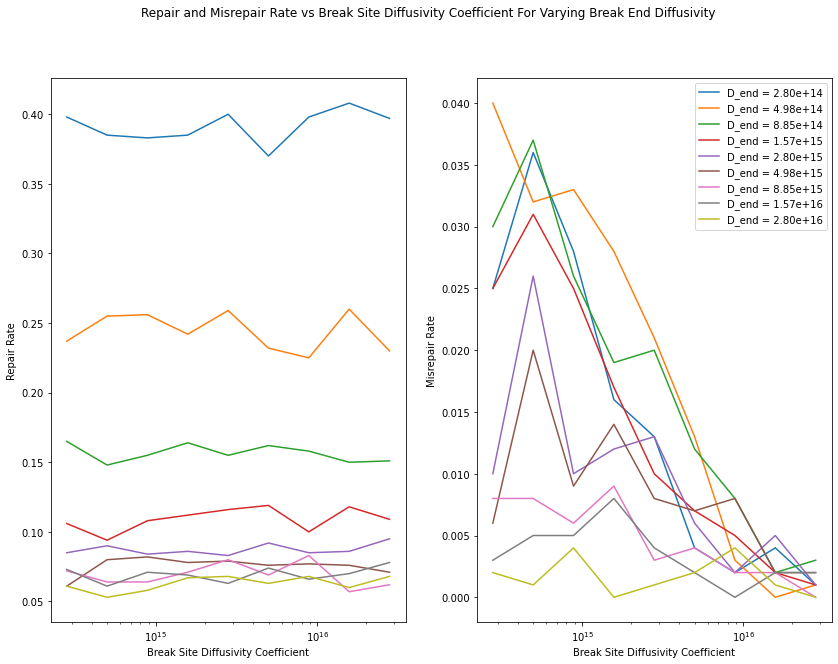

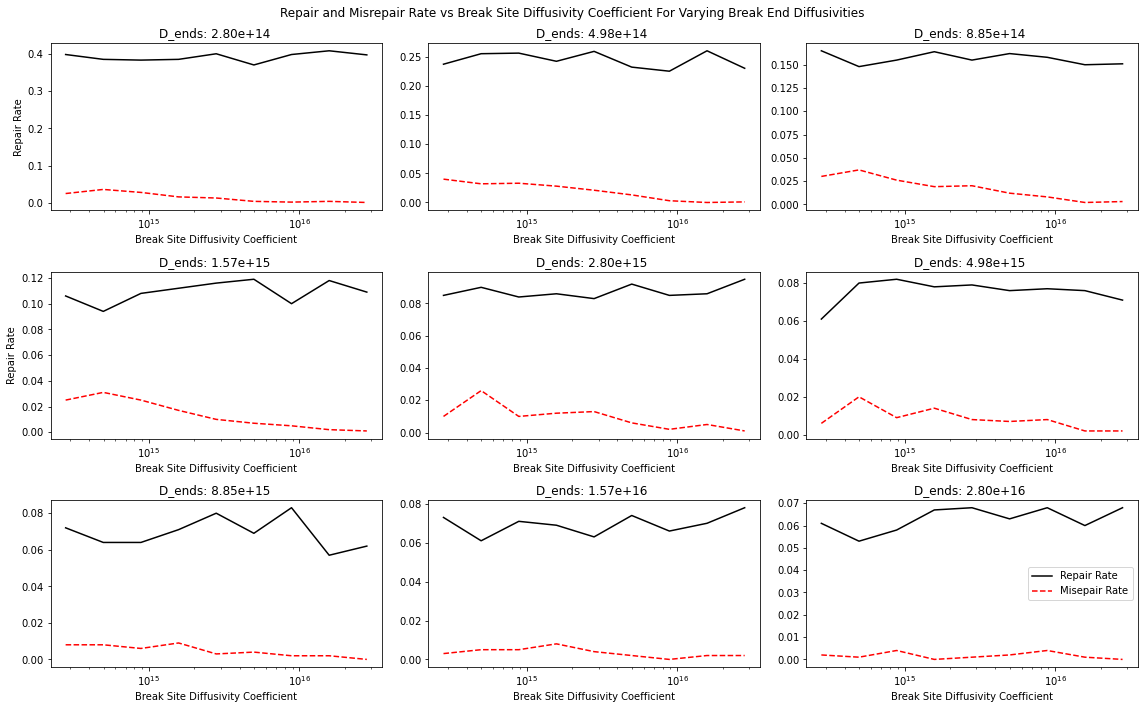

In [81]:
print_full(df_14_16_4)
plot_De_and_Ds(df_14_16_4)
plot_De_and_Ds_subplots(df_14_16_4,plot_dim_1=3,plot_dim_2=3)

In [230]:
def ctrw4_De_Ds_mc_new(samples, initial_pos, D_sites,D_ends, diff_time, run_time, min_wait_time, 
                         anom_diff_exp,int_length, delay_time, interaction_p=1, plot=False):
    
    nrows = len(D_sites)*len(D_ends)
    repair_data_De_Ds = np.zeros((nrows,6))
    
    print(nrows)
    
    for j,De in enumerate(D_ends):
        
        print('----------------')
             
        repair_avgs = np.empty(len(D_sites))
        repair_stds = np.empty(len(D_sites))
    
        for k,Ds in enumerate(D_sites):
            
            print(j*len(D_sites)+k)
            print(De,Ds)

            repair_rates = np.zeros(samples)
            misrepair_rates = np.zeros(samples)

            for i in np.arange(samples):

                rep_t, rep_arr = coupled_ctrw_for_mc(initial_pos, D_sites, D_ends, diff_time, run_time,
                                                     min_t, alpha,int_length, delay_t, plot=False)
                
                if rep_arr[-1] == 1.0:
                    repair_rates[i] = 1.0
                elif rep_arr[-1] == -1.0:
                    misrepair_rates[i] = 1.0
                    
            repair_avg = np.nanmean(repair_rates)
            misrepair_avg = np.nanmean(misrepair_rates)
            
            repair_std = np.nanstd(repair_rates)
            misrepair_std = np.nanstd(misrepair_rates)
            
            repair_data_row = np.array([De,Ds,repair_avg,repair_std,misrepair_avg,misrepair_std])
            repair_data_De_Ds[j*len(D_sites)+k] = repair_data_row
            
    repair_df_De_Ds = pd.DataFrame(data=repair_data_De_Ds, columns=['D_ends','D_sites','Repair Rate',
                                                                'Repair Rate Std','Misrepair Rate',
                                                                'Misrepair Rate Std']) 
    
    return repair_df_De_Ds

### Scrap

In [26]:
# def ctrw_3d_interaction(initial_pos, diff_coeff, diff_time, run_time, min_wait_time, anom_diff_exp,
#                         int_length, interaction_p=0.5, plot=0, return_trajectories=False):
#     """
#     """
#     repair = 0 
#     time1 = 0
#     time2 = 0 
    
#     x1, y1, z1 = initial_pos[0]
#     x2, y2, z2 = initial_pos[1]
    
#     times1 = np.array([time1])
#     times2 = np.array([time2])
    
#     coords1 = np.array([x1, y1, z1])
#     coords2 = np.array([x2, y2, z2])
    
#     interaction_coords = np.array([0,0,0,0,0,0])
#     interaction_times = np.array([0,0])
#     interaction_count = 0
#     int_count_arr = np.array(interaction_count)
#     repair_arr = np.array([repair])

#     while (time1 < run_time or time2 < run_time) and repair==0:
        
#         waiting_time1 = get_waiting_time(min_wait_time, anom_diff_exp)
#         waiting_time2 = get_waiting_time(min_wait_time, anom_diff_exp)
        
#         time1 += waiting_time1  
#         times1 = np.append(times1, time1)
        
#         time2 += waiting_time2
#         times2 = np.append(times2, time2)

#         coords1 = gauss_step_3d(coords1, diff_coeff, diff_time)
#         coords2 = gauss_step_3d(coords2, diff_coeff, diff_time)
        
#         distance = get_distance_3d(coords1[-1],coords2[-1])
        
#         if distance < int_length:
            
#             interaction_count += 1
#             int_coords_temp = np.append(coords1[-1],coords2[-1])
#             repair = interaction_process(interaction_p)
            
#             if interaction_count == 1:
#                 interaction_times = np.array([time1,time2])
#                 interaction_times = np.reshape(interaction_times,(1,len(interaction_times)))
#                 interaction_coords = np.reshape(int_coords_temp,(1,len(int_coords_temp)))
#                 int_count_arr = np.array([interaction_count])
#                 repair_arr = np.array([repair])
                
#             else: 
#                 interaction_times = np.vstack((interaction_times,np.array([time1,time2])))
#                 interaction_coords = np.vstack((interaction_coords,int_coords_temp))
#                 int_count_arr = np.append(int_count_arr,interaction_count)
#                 repair_arr = np.append(repair_arr,repair)


#     data1 = {'t': times1, 'x': coords1[:,0], 'y': coords1[:,1], 'z': coords1[:,2]}
#     df1 = pd.DataFrame(data1)
#     data2 = {'t': times2, 'x': coords2[:,0], 'y': coords2[:,1], 'z': coords2[:,2]}
#     df2 = pd.DataFrame(data2)
    
    
#     """
#     if plot ==1:              
#         %matplotlib notebook
#         fig = plt.figure()
#         ax = plt.axes(projection ='3d')
#         ax.plot3D(df1['x'], df1['y'], df1['z'])
#         ax.plot3D(df2['x'], df2['y'], df2['z'])
#         ax.scatter(df1['x'].iloc[0], df1['y'].iloc[0], df1['z'].iloc[0],marker='x',c='k')
#         ax.scatter(df2['x'].iloc[0], df2['y'].iloc[0], df2['z'].iloc[0],marker='x',c='k')
        
#         if interaction_count > 1:
#             ax.scatter(interaction_coords[:-1,0],interaction_coords[:-1,1],
#                        interaction_coords[:-1,2],c='k')
#             if repair == 1:
#                 ax.scatter(interaction_coords[-1,0],interaction_coords[-1,1],
#                        interaction_coords[-1,2],c='r')
                
#         elif interaction_count == 1:
#             ax.scatter(interaction_coords[0],interaction_coords[1],
#                        interaction_coords[2],c='k')
#             if repair == 1:
#                 ax.scatter(interaction_coords[-0],interaction_coords[1],
#                        interaction_coords[2],c='r')
                       
#     """
#     if return_trajectories:
#         return df1, df2
#     else:
#         return interaction_times, interaction_coords, int_count_arr, repair_arr
            

def ctrw_self_interaction_new(initial_pos, diff_coeff, diff_time, run_time, min_wait_time, anom_diff_exp,
                              int_length,strand_length, interaction_p=0.5, plot=0, return_trajectories=False):
    """
    initial_pos: 2d array e.g. [(x1,y1,z1), (x2,y2,z2)]
    """
    repair = 0 
    time1 = 0
    time2 = 0 
    
    x1, y1, z1 = initial_pos
    x2, y2, z2 = initial_pos + strand_length*unit_vector_single()    
    
    times1 = np.array([time1])
    times2 = np.array([time2])
    
    coords1 = np.array([[x1, y1, z1]])
    coords2 = np.array([[x2, y2, z2]])
    
    interaction_coords = np.array([[0,0,0,0,0,0]])
    interaction_times = np.array([0])
    interaction_count = 0
    int_count_arr = np.array(interaction_count)
    repair_arr = np.array([repair])

    
    while (time1 < run_time and time2 < run_time) and repair==0:
        """
        
        # the particle that is behind in time takes a step
        if time1 < time2:
            waiting_time1 = get_waiting_time(min_wait_time, anom_diff_exp)
            time1 += waiting_time1
            times1 = np.append(times1, time1)
            times1 = np.append(times1, time1)
            coords1 = gauss_step_3d(coords1, diff_coeff, diff_time)
        else:
            waiting_time2 = get_waiting_time(min_wait_time, anom_diff_exp)
            time2 += waiting_time2
            times2 = np.append(times2, time2)
            times2 = np.append(times2, time2)
            coords2 = gauss_step_3d(coords2, diff_coeff, diff_time)
            
        """
    
        time1_t,time2_t,times1_t,times2_t,coords1_t,coords2_t = step_check_time_f(time1,time2,times1,times2,coords1,
                                                                                  coords2,diff_coeff,diff_time,min_wait_time,
                                                                                  anom_diff_exp)
        distance = get_distance_3d(coords1_t[-1],coords2_t[-1])
        
        #repeat increments of time/space until correct spatial dispalcement found
        #distance must be less than strand length
        #Crude implementation currently, ideally just step in space would be recalculated
        
        #print(distance)
        while distance > strand_length:
            print('!')
            
            time1_t,time2_t,times1_t,times2_t,coords1_t,coords2_t = step_check_time_f(time1,time2,times1,times2,coords1,coords2,
                                                                                      diff_coeff,diff_time,min_wait_time,
                                                                                      anom_diff_exp)
            
            distance = get_distance_3d(coords1_t[-1],coords2_t[-1])
                  
        #print(distance)
            
        time1,time2,times1,times2,coords1,coords2 = time1_t,time2_t,times1_t,times2_t,coords1_t,coords2_t
            
        if distance < int_length:
            
            interaction_count += 1
            int_coords_temp = np.append(coords1[-1],coords2[-1])
            repair = interaction_process(interaction_p)
            if time1 < time2 and time1!=0:
                int_time = time1
            else:
                int_time = time2
            
            if interaction_count == 1:
                interaction_times = np.array([int_time])
                interaction_times = np.reshape(interaction_times,(1,len(interaction_times)))
                interaction_coords = np.reshape(int_coords_temp,(1,len(int_coords_temp)))
                int_count_arr = np.array([interaction_count])
                repair_arr = np.array([repair])
                
            else: 
                interaction_times = np.vstack((interaction_times,np.array([int_time])))
                interaction_coords = np.vstack((interaction_coords,int_coords_temp))
                int_count_arr = np.append(int_count_arr,interaction_count)
                repair_arr = np.append(repair_arr,repair)
    
    if repair==1:
        # record final position at time of repair 
        if time1 > time2:
            times2 = np.append(times2, time1)
            coords2 = np.vstack((coords2, coords2[-1]))
        else:
            times1 = np.append(times1, time2)
            coords1 = np.vstack((coords1, coords1[-1]))
    
    if repair==0:
        # correction so run time not exceeded
        if time1 > run_time:
            times1 = times1[:-2]
            coords1 = coords1[:-2]
        if time2 > run_time:
            times2 = times2[:-2]
            coords2 = coords2[:-2]
        if times1[-1] < run_time:
            times1 = np.append(times1, run_time)
            coords1 = np.vstack((coords1, coords1[-1]))
        if times2[-1] < run_time:
            times2 = np.append(times2, run_time)
            coords2 = np.vstack((coords2, coords2[-1]))
    
    data1 = {'t': times1, 'x': coords1[:,0], 'y': coords1[:,1], 'z': coords1[:,2]}
    df1 = pd.DataFrame(data1)
    data2 = {'t': times2, 'x': coords2[:,0], 'y': coords2[:,1], 'z': coords2[:,2]}
    df2 = pd.DataFrame(data2)
    
    if plot==1:              
        %matplotlib notebook
        fig = plt.figure(figsize=(10,10))
        ax = plt.axes(projection ='3d')
        ax.plot3D(df1['x'], df1['y'], df1['z'])
        ax.plot3D(df2['x'], df2['y'], df2['z'])
        ax.set_title('Interaction count: {},   Repair: {} \n Ran for {} s'.format(interaction_count, repair, times1[-1]))
        ax.set_xlabel('x (nm)')
        ax.set_ylabel('y (nm)')
        ax.set_zlabel('z (nm)')
        ax.scatter(df1['x'][0], df1['y'][0], df1['z'][0], marker='x', c='lime')
        ax.scatter(df2['x'][0], df2['y'][0], df2['z'][0], marker='x', c='lime')
        ax.scatter(df1['x'].iat[-1], df1['y'].iat[-1], df1['z'].iat[-1], marker='x', c='red')
        ax.scatter(df2['x'].iat[-1], df2['y'].iat[-1], df2['z'].iat[-1], marker='x', c='red')
        if interaction_count > 1:
            for i, coords in enumerate(interaction_coords):
                ax.plot3D([coords[0], coords[3]], [coords[1], coords[4]], [coords[2], coords[5]], c='k', ls='dotted')
                if repair==1 and i==interaction_count-1:
                    ax.plot3D([coords[0], coords[3]], [coords[1], coords[4]], [coords[2], coords[5]], c='m', ls='dashed')

    if return_trajectories:
        return interaction_times, interaction_coords, int_count_arr, repair_arr, df1, df2
    else:
        return interaction_times, interaction_coords, int_count_arr, repair_arr
        
        
       
def int_time(int_index,i_times,i_counts,count_jk,tj,tk,coordsj,coordsk,int_length,interaction_p=0.5):
        
        i_counts_row = i_counts[-1]
        
        count_jk += 1
        i_coords_temp = np.append(coordsj[-1],coordsk[-1])
        
        repair = interaction_process(interaction_p)
        if tj < tk and tj!=0:
            t_jk = tj
        else:
            t_jk = tk


        i_times = np.vstack(i_times,np.arrya([t_jk]))
        
        i_counts_row[int_index] += 1 
        i_counts = np.vstack(i_counts,i_counts_row)
        
    return i_times,i_counts
            

            

In [131]:
x = np.array([1,4,6,4])
i = np.argsort(x)
x[i]

array([1, 4, 4, 6])

In [53]:
# def unit_vector_single():
#     #Streamlined function to return only a single vector, distributed in the same manner as above.
#     #Plotting of the above vectors in large quantity attest the validity of using this function.
    
#     random_value_1 = np.random.uniform(0,1)
#     random_value_2 = np.random.uniform(0,1)
    
#     #ICDFs produced as before
#     inclination = np.arccos(1-2*random_value_1)
#     azimuth = 2*(np.pi)*random_value_2
    
#     #cartesian conversion
#     x = np.cos(azimuth)*np.sin(inclination)
#     y = np.sin(azimuth)*np.sin(inclination)
#     z = np.cos(inclination)
    
#     return np.array([x,y,z])

# def ctrw_3d_self_interaction(initial_pos,diff_coeff,diff_time,run_time,min_wait_time,anom_diff_exp,
#                         int_length,strand_length,interaction_p=1,plot=0):
#     """
#     """
#     repair = 0 
#     time1 = 0
#     time2 = 0 
    
#     x1, y1, z1 = initial_pos
#     x2, y2, z2 = initial_pos + strand_length*unit_vector_single()

#     times1 = np.array([time1])
#     times2 = np.array([time2])
    
#     coords1 = np.array([[x1, y1, z1]])
#     coords2 = np.array([[x2, y2, z2]])
    
#     interaction_coords = np.array([0,0,0,0,0,0])
#     interaction_times = np.array([0])
#     interaction_count = 0
    
#     int_count_arr = np.array(interaction_count)
#     repair_arr = np.array([repair])

#     while (time1 < run_time or time2 < run_time) and repair ==0:
        
#         """
#         waiting_time1 = get_waiting_time(min_wait_time, anom_diff_exp)
#         waiting_time2 = get_waiting_time(min_wait_time, anom_diff_exp)
        
#         time1 += waiting_time1  # update current time
#         times1 = np.append(times1, time1)
        
#         time2 += waiting_time2  # update current time
#         times2 = np.append(times2, time2)
        
#         coords1_temp = gauss_step_3d(coords1,diff_coeff, diff_time)
#         coords2_temp = gauss_step_3d(coords2,diff_coeff, diff_time)
        
#         coords_temp = np.array([coords1_temp,coords2_temp])
#         """
#         coords1_temp = coords1
#         coords2_temp = coords2
        
#         # the particle that is behind in time takes a step
#         if time1 < time2:
#             waiting_time1 = get_waiting_time(min_wait_time, anom_diff_exp)
#             time1 += waiting_time1
#             times1 = np.append(times1, time1)
#             times1 = np.append(times1, time1)
#             coords1 = gauss_step_3d(coords1, diff_coeff, diff_time)
#         else:
#             waiting_time2 = get_waiting_time(min_wait_time, anom_diff_exp)
#             time2 += waiting_time2
#             times2 = np.append(times2, time2)
#             times2 = np.append(times2, time2)
#             coords2 = gauss_step_3d(coords2, diff_coeff, diff_time)
            
#         distance = get_distance_3d(coords1[-1],coords2[-1])
        
#         coords_tt = np.array([coords1_,coords2])

#         while (distance > strand_length):
            
#             coords_tt = coords_temp
               
#             i = np.random.randint(0,1)
            
#             print(coords_tt[i])
#             print(coords_temp[i])
               
#             coords_tt[i] = gauss_step_3d(coords_temp[i],diff_coeff, diff_time)
            
#             print(coords_tt[i])
#             print(coords_temp[i])
            
#             distance = get_distance_3d(coords_tt[0][-1],coords_tt[1][-1])
            
#         coords1,coords2 = coords_tt

#         if distance < int_length:
            
#             interaction_count += 1
#             int_coords_temp = np.append(coords1[-1],coords2[-1])
#             repair = interaction_process(interaction_p)
            
#             if interaction_count == 1:
#                 interaction_times = np.array([time1,time2])
#                 interaction_times = np.reshape(interaction_times,(1,len(interaction_times)))
#                 interaction_coords = np.reshape(int_coords_temp,(1,len(int_coords_temp)))
#                 int_count_arr = np.array([interaction_count])
#                 repair_arr = np.array([repair])
                
#             else: 
#                 interaction_times = np.vstack((interaction_times,np.array([time1,time2])))
#                 interaction_coords = np.vstack((interaction_coords,int_coords_temp))
#                 int_count_arr = np.append(int_count_arr,interaction_count)
#                 repair_arr = np.append(repair_arr,repair)


#     data1 = {'t': times1, 'x': coords1[:,0], 'y': coords1[:,1], 'z': coords1[:,2]}
#     df1 = pd.DataFrame(data1)
#     data2 = {'t': times2, 'x': coords2[:,0], 'y': coords2[:,1], 'z': coords2[:,2]}
#     df2 = pd.DataFrame(data2)
    
    
#     """
#     if plot ==1:              
#         %matplotlib notebook
#         fig = plt.figure()
#         ax = plt.axes(projection ='3d')
#         ax.plot3D(df1['x'], df1['y'], df1['z'])
#         ax.plot3D(df2['x'], df2['y'], df2['z'])
#         ax.scatter(df1['x'].iloc[0], df1['y'].iloc[0], df1['z'].iloc[0],marker='x',c='k')
#         ax.scatter(df2['x'].iloc[0], df2['y'].iloc[0], df2['z'].iloc[0],marker='x',c='k')
        
#         if interaction_count > 1:
#             ax.scatter(interaction_coords[:-1,0],interaction_coords[:-1,1],
#                        interaction_coords[:-1,2],c='k')
#             if repair == 1:
#                 ax.scatter(interaction_coords[-1,0],interaction_coords[-1,1],
#                        interaction_coords[-1,2],c='r')
                
#         elif interaction_count == 1:
#             ax.scatter(interaction_coords[0],interaction_coords[1],
#                        interaction_coords[2],c='k')
#             if repair == 1:
#                 ax.scatter(interaction_coords[-0],interaction_coords[1],
#                        interaction_coords[2],c='r')
                       
#     """
        
#     return interaction_times,interaction_coords,int_count_arr,repair_arr